# Supervised Learning: Linear Regression

### Machine Learning

Jay Urbain, PhD

References:

- James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning, with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4.

- [scikit-learn](http://scikit-learn.org/stable/) 

In this notebook we will be working through a *linear regression* application using *scikit-learn*. 

Answer **questions** in the empty cell(s) below each question in the notebook. Here are the steps we will follow. Also summarize your answers to each question in your lab report.


1: Importing the data.

2: Visualizing the data.

3: Review Ordinary Least Squares (OLS) regression.

4: Use Numpy for univariate linear regression.

5: Determing the error of our model fit.

6: Use *scikit-learn* to implement multivariate regression.

7: Use training and validation data sets.  

8: Predicting prices

9: Generating residual plots
    

### 1: Importing the data.

Import the Numpy and Pandas libraries.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

[Searborn statistical](https://stanford.edu/~mwaskom/software/seaborn/) visualization library installation

Use the conda package to install the seaborn library from a terminal window as follows:

conda install seaborn

Import plotting packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# plots within notebook versus launching a separate window
%matplotlib inline 

Import the Boston housing dataset.

*Notes: 
- You may have to run a separate download, scikit learn will read an error and prompt you if you don't have the datasets.
- Notice the type of the Boston data set.

In [3]:
from sklearn.datasets import load_boston

Load the Boston dataset. 

In [4]:
boston = load_boston()
print ('Dataset: ', type(boston))
# the actual data is in a numpy array
print ('Data: ', type(boston.data))

Dataset:  <class 'sklearn.utils.Bunch'>
Data:  <class 'numpy.ndarray'>


The built-in datasets have meta-data included that describe the data. This is not the case with most datasets. Typically you'll have to dig around for information. You'll also have to spend considerably more time cleaning and normlizing the data.

You can access the meta-data via the DESCR field:

In [5]:
print( boston.DESCR )

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 2: Visualize the data

Its *always* a good idea to visualize your data. 

We can use matplotlib.pyplot to generate a histogram. In the built-in datasets, the target field represents the column in the numpy multi-dimensional array (matrix) that is the *target* variable, i.e., what we are trying to predict.

Text(0.5,1,'Figure 1. Price Histogram')

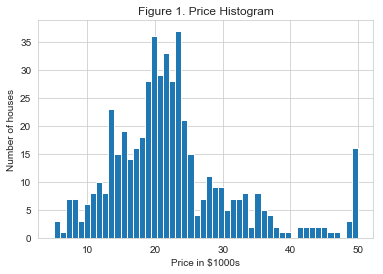

In [6]:
# Histogram of prices (this is the target of our dataset)
plt.hist(boston.target, bins=50)

#label
plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')
plt.title('Figure 1. Price Histogram')

Scatter plot of prices

We can use a scatter plot of prices versus the number of rooms in the dwelling, or prices versus any other predictor to explore the data.

Figure 2. Price versus Number of Rooms Scatter Plot


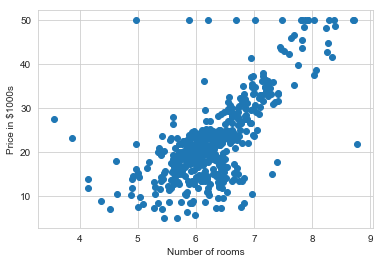

In [7]:
# Plot the column at the 5 index (Labeled RM)
plt.scatter(boston.data[:,5], boston.target)

#label
plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')
print('Figure 2. Price versus Number of Rooms Scatter Plot')

We can see a trend showing that in general, price increases with an increasing number of rooms in the house. Makes sense.

**Q1) There's an anomolly in the price target variable in the Boston dataset. What is it? See figures 1 and 2 above. Answer in the cell below.**

In [ ]:
The prices have of houses have an abrupt end at $50000 and there is also an abnormally high number of houses priced at this number.
This might indicate that the data set was either truncated at $50000 and/or that prices above this value were rounded down.

 We can use the Seaborn statistical visulization package to plot a linear regression model on the scatter plot to visualize how well a linear regression model fits the data. Seaborn requires that the data be in a pandas DataFrame.

In [8]:
# load the data into a pandas DataFrame
boston_df = DataFrame(boston.data)

# add label columns to the dataframe from the original dataset
boston_df.columns = boston.feature_names

#show
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Add the target variable, price, i.e., the variable we are tring to predict in the Boston data set. 

Create a new price column in the DataFrame.

In [9]:
# Set price column for target
boston_df['Price'] = boston.target

In [10]:
# Show result
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The Seaborn lmplot() function, fits a linear regression model to the data, plots the data as a scater plot, and adds the regression line. 

C:\Users\geromelrr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Figure 3. Linear Model Regression Plot


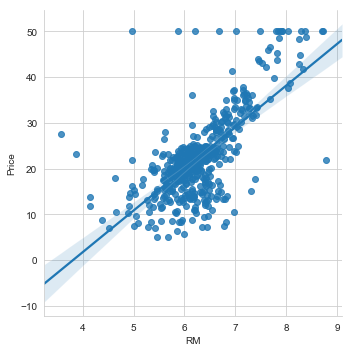

In [11]:
# Use seabron to create and plot a linear fit
sns.lmplot('RM','Price',data = boston_df)
print ('Figure 3. Linear Model Regression Plot')

*Note: The transluscent bands correspond to the confidence interval. The default is ci=95% confidence interval*
https://web.stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html

### 3: Ordinary Least Squares (OLS) Regression

OLS regression fits a linear model (line in univariate regression, plane with two variates) by minimizing the residual sum of squares. Residuals are shown as red lines in the plot below. The residuals represent the difference between the predicted (point on line) and actual data (point). *Note: the plot below was generated from a different dataset using R. It is for illustrative purposes.*

Figure 4. Linear regression residuals


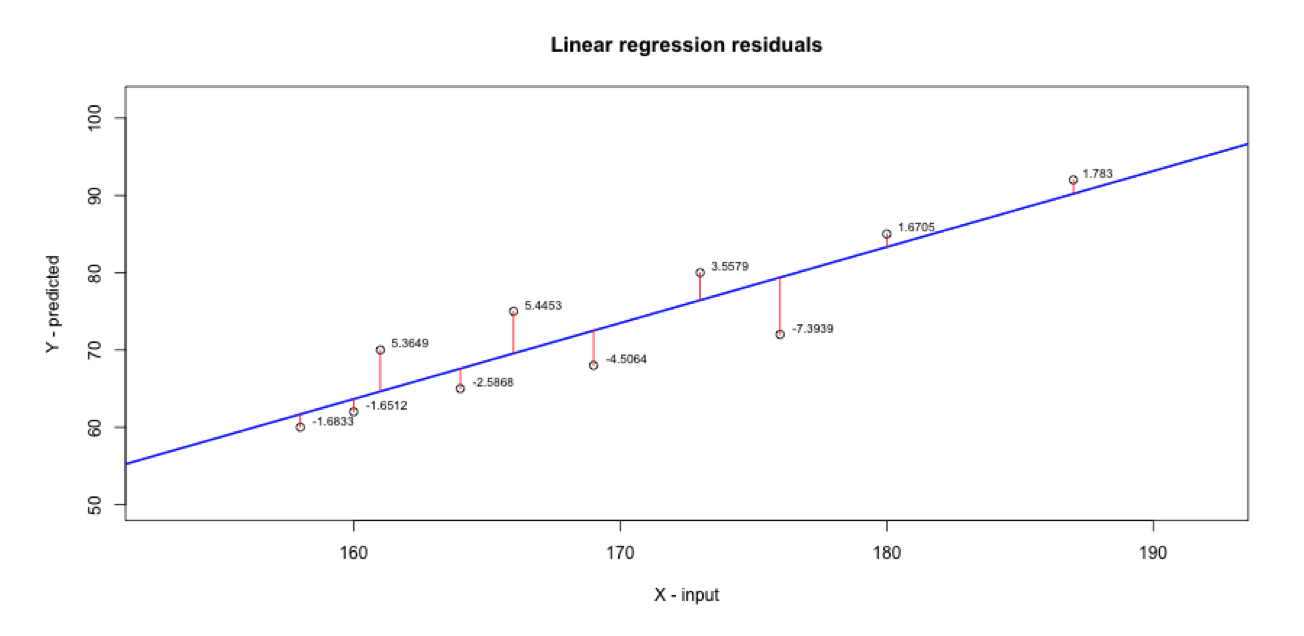

In [12]:
# Plot of linear regression residuals
from IPython.display import Image
print( 'Figure 4. Linear regression residuals' )
Image('linear_regression_residuals.png')

Best fit is defined as the line that minimizes the residual sum of squares:

$RSS=\sum_{i}^{m}(\hat{y}_i - {y}_i)^2$

Where $\hat{y}=\beta_0 + \beta_1x$

The least-square line approximating the set of points:

$ (x,y)_{1},(x,y)_{2},(x,y)_{3},...,(x,y)_{m}$

has the equation: $ \hat{Y} = \beta_{0} +\beta_{1}X $

I.e., the equation of a line: $Y=mx+b$


We can solve for our coefficients using gradient descent (see lab 2) or the normal equation (see class materials).

### 4: Using Numpy for a Univariate Linear Regression

Numpy has a OLS method in its linear algebra library. We'll use this for our univariate regression. We will move on to scikit-learn for Multivariate regression.

Numpy expects a *2D* array. The first dimension contains the different values. The second dimension contains the attribute number. In this case, the value is the mean number of rooms per house. Since this is a single attribute, the second dimension of the array is 1. So we need to create a (506,1) shape array. We can use numpy's vertical stack tool, *vstack*, to do this.

In [13]:
# Set up X as the room median values
X = boston_df.RM
print( X[1:5])

# Use vstack to make X two-dimensional
X = np.vstack(boston_df.RM)
print( X[1:5])

# Set up Y as the house target price.
Y = boston_df.Price

1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64
[[6.421]
 [7.185]
 [6.998]
 [7.147]]


The linear regression model: $Y=mX+b$

can be represented in matrix form: $Y=A\beta$

where: $A = \begin{bmatrix}x & 1\end{bmatrix}$

and $\beta = \begin{bmatrix}m \\b\end{bmatrix}$

We can calculate the $A$ matrix using numpy. We can do this by creating a matrix in the form $[X 1]$,

In [14]:
# Create the X array in the form [X 1]
X = np.array( [ [value,1] for value in X ] )

Now we can get the best fit values.

In [16]:
X = X.astype('float')

C:\Users\geromelrr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\geromelrr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

In [ ]:
# Now calculate our coefficients for the best fit line
X = X.astype('float')
m, b = np.linalg.lstsq(X, Y)[0]
np.linalg.lstsq(X, Y)

We can plot the data using the original data format of the Boston housing information. We performed the matrix transformations to utilize the numpy least square method.

Figure. 5, Price vs. Mean Number of Rooms


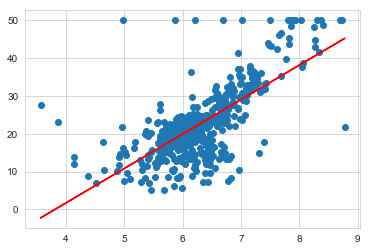

In [17]:
# Plot points, Price vs Mean Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Plot best fit line
x= boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')
print ('Figure. 5, Price vs. Mean Number of Rooms')

### 5: Getting the error 

**Q2) Calculate the RSS (as defined in step 3) for the univariate linear regression model of the Boston dataset created in step 4.** Use the cell below.

$RSS=\sum_{i}^{m}(\hat{y}_i - {y}_i)^2$

Where $\hat{y}=\beta_0 + \beta_1x$

In [ ]:
for x in X:
    RSS += ((m*x + b) - ) ** 2
    
RSS

We can calculate the [root mean square error](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html) of our fitted regression line.

The result array has the residual squared error (RSS). For each element, it checks the the difference between the line (our prediction) and the true value, squares it, and returns the sum of all these. This is the RSS value.

The root mean squared error is similar to the standard deviation. To find the root mean square error we divide by the number of elements and then take the square root. 

$RMSE=\sqrt{\dfrac{RSS}{N}}$

**Q3) Calculate the RMSE.** Use the cell below.

Note: numpy has a linear algebra package containing a function for calculating the 


In [ ]:
RMSE = sqrt(RSS/size(boston_df.RM))

Since the root mean square error (RMSE) corresponds to the standard deviation, we can say that the price of a house will not vary by more than 2 times the RMSE 95% of the time. 

**Q4. How much will the price of a house vary 95% of the time?** Use the cell below.

**Q5) Calculate the TSS for the univariate linear regression model of the Boston dataset.** Use the cell below.

$TSS=\sum_{i}^{m}({y}_i - \bar{y})^2$

In [ ]:
# Use vstack to make X two-dimensional
X = boston_df.RM

# Set up Y as the house target price.
Y = boston_df.Price

# your work here



**Q6) Calcualte $R^2$ for the univariate linear regression model of the Boston dataset.** Use the cell below.

$R^2=\dfrac{TSS - RSS}{TSS} = 1 - \dfrac{RSS}{TSS}$

### 6: Scikit-learn for multivariate regression

*Scikit-learn* can be used for univariate or multivariate regression.

The [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class is called an estimator. 

Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the *fit()* and *predict()* methods. The *fit()* method is used to learn the parameters of a model, and the *predict()* method is used to predict the value of a response variable for a given predictor variable using the learned coefficients. 

In [ ]:
# Import Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Create a LinearRegression object.

*Note: After typing in an object, you can press tab to see a list of methods*.

In [ ]:
# Create a LinearRegression Object
lreg = LinearRegression()

LinearRegression functions:

- lreg.fit(): fits a linear model

- lreg.predict(): predict Y from X using the linear regression model coefficients

- lreg.score(): returns $R^2$, the [coefficient of determination](http://en.wikipedia.org/wiki/Coefficient_of_determination)

Separate the Boston dataframe into data columns and the target column:

In [ ]:
# Data Columns
X_multi = boston_df.drop('Price',1)

# Targets
Y_target = boston_df.Price

Fit the linear regression model to X & Y.

In [ ]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

Check the intercept and the number of coefficients.

In [ ]:
print(' The estimated intercept coefficient is %.2f ' %lreg.intercept_)

In [ ]:
print(' The number of coefficients used was %d ' % len(lreg.coef_))

[Documentation](http://scikit-learn.org/stable/modules/linear_model.html).

$ y(\beta,x) = \beta_0 + \beta_1 x_1 + ... + \beta_p x_p $

Where $\beta = (\beta_1, ...\beta_p)$ are the coefficients and $ \beta_0 $ as the intercept.

In [ ]:
# Create a DataFrame from the Features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Add a new column with the coefficients from the linear regression
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)

# Show
print ('Table 1. Multivariate coefficients')
coeff_df

**Q7) Which coefficients, excluding nitric oxide (NOX) have the strongest correlation with the target variable>** Use the cell below.

### 7: Using Training and Validation Sets

Separate training and test sets should be used to train and validate the model respectively.

Samples for each set should be randomly selected.

Fortunately, scikit-learn has a built in function specifically for this called train_test_split.

The Scikit-learn [validation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) library has a function for this purpose. Below, we are creating separate training and tests sets, holding out 40% of the data for testing. 

In [ ]:
# from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price, test_size=0.4, random_state=0)


print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


Display the results of the data split.

In [ ]:
# Print shapes of the training and testing data sets
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# numpy expects matrix with dimension column
X_train = X_train.values.reshape(X_train.shape[0],1)
Y_train = Y_train.values.reshape(Y_train.shape[0],1)
X_test = X_test.values.reshape(X_test.shape[0],1)
Y_test = Y_test.values.reshape(Y_test.shape[0],1)

print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

### 8: Predicting Prices

We can use our training set to build the model, and the test set to evaluate the performance of our model.

In [ ]:
# Regression object
lreg = LinearRegression()

# Build a linear regression model on the training data only
lreg.fit(X_train,Y_train)

Perform prediction on both the training set and the test set.

In [ ]:
# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Calculate the mean square error for each:

In [ ]:
print ("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2) )
    
print ("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  % np.mean((Y_test - pred_test) ** 2) )



### Step 9 : Residual Plots

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable (x) on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data.  A good model fit will show data points randomly and evenly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some aspect of the data. There could be an interaction between predictor variables that we are not considering, or the data may be inherently non-linear. 

[Residual plots](http://blog.minitab.com/blog/adventures-in-statistics/why-you-need-to-check-your-residual-plots-for-regression-analysis).

In [ ]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Looks like there aren't any major patterns to be concerned about, it may be interesting to check out the line occuring towards the bottom right, but overall the majority of the residuals seem to be randomly distributed above and below the horizontal.

Linear regression is a broad topic with many applications. More information can be found in the scikit-lear documentation:  http://scikit-learn.org/stable/modules/linear_model.html#linear-model

### Questions

**Q8) Review Table 1. Multivariate coefficients. Think about the meaning of a linear regression model, i.e., the 
coefficient reflects the change in the target variable for a one unit change in an input variable, with all other 
variables held constant. Identify a subset of features and build a model with these features. See if you can reduce 
RMSE and increase $R^2$.** 

Document your results in the cell below.